# 이미지를 읽어들이기

In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

# URL로부터 이미지 파일 저장

img_url = 'http://sipi.usc.edu/database/preview/misc/4.2.01.png'
filename = 'milk.png'
#img_url = 'http://data.si.re.kr/photo_ndownload/21555'
#filename = 'seoul.jpg'

img_path = keras.utils.get_file(filename, img_url)
img_path

29931/29931 [==============================] - 0s 0us/step


'/Users/nhn/.keras/datasets/milk.png'

**PIL**

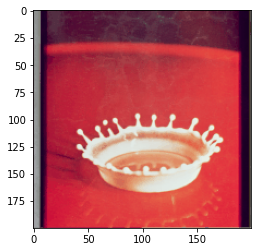

In [2]:
# Python Image Library
from PIL import Image

img = Image.open(img_path)  # use Image.open(image_location)
image = np.array(img.convert('RGB'))  # to convert img object to array value use np.array

plt.imshow(image)

In [4]:
print(image[0][0])

[95 87 86]


**OpenCV**

[86 87 95]
[95 87 86]


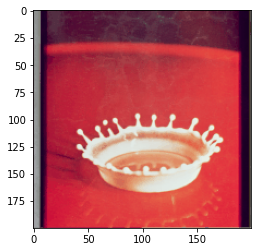

In [7]:
import cv2

image = cv2.imread(img_path)
print(image[0][0])
# convert opencv RGB for opencv
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image[0][0])
plt.imshow(image)

array([0.37254903, 0.34117648, 0.3372549 , 1.        ], dtype=float32)

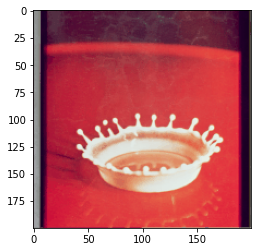

In [8]:
from matplotlib import image as mp_image

img = mp_image.imread(img_path)
plt.imshow(img)
img[0][0]

MNIST 데이터

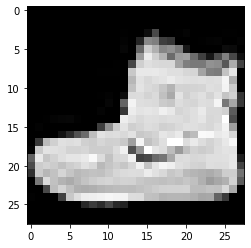

In [14]:
from tensorflow import keras
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.imshow(train_images[0], cmap=plt.cm.gray)

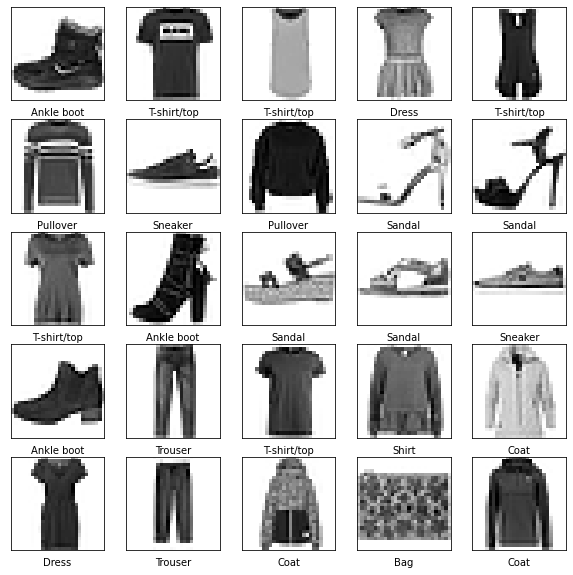

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 이미지 저장

In [17]:
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [23]:
# PIL
from PIL import Image
import numpy as np

PIL_image = Image.fromarray(np.uint8(image)).convert('RGB')
PIL_image.save('test.png')

In [25]:
# opencv
import cv2

# convert opencv RGB for opencv
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite('test.png', image2)

True

In [20]:
# matplotlib
from matplotlib import pyplot as plt

plt.imsave('test.png', image)

In [21]:
# 'ls -l'은 리눅스에서 파일 목록을 표시하는 명령어 입니다.
! ls -l test.png

-rw-r--r--  1 nhn  staff  53525  6 18 21:38 test.png


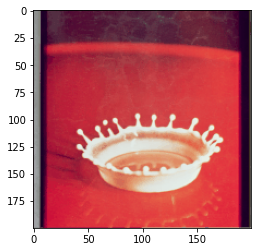

In [26]:
from matplotlib import image as mp_image

image3 = mp_image.imread('test.png')
plt.imshow(image3)

# 매트릭스 dot product

**매트릭스 연산**

![](https://latex.codecogs.com/gif.latex?%5Cbegin%7Bbmatrix%7D%2010%5C%5C4%20%5Cend%7Bbmatrix%7D%20%3D%20%5Cbegin%7Bbmatrix%7D%202%20%26%201%5C%5C%200%20%26%201%20%5Cend%7Bbmatrix%7D%20%5Cbegin%7Bbmatrix%7D%203%5C%5C%204%20%5Cend%7Bbmatrix%7D)


In [27]:
import numpy as np

w = np.array([[2, 1],
              [0, 1]])
x = np.array([3, 4])
y = np.dot(w, x)
print(y)

[10  4]


In [28]:
# 컬럼 벡터 (수식과 같은 모양)
x = np.array([[3],
              [4]])
y = np.dot(w, x)
print(y)
print(y.shape)

[[10]
 [ 4]]
(2, 1)


**행렬(matrix) 곱하기**  

Shape이 $(m,n)$인 행렬과 $(n,l)$인 행렬을 곱하면 어떻게 될까요?  
가운데 항인 $n$이 사라집니다.  

$$
\require{cancel}
\begin{align*}
(m,n)\cdot(n,l) &= (m,\cancel n)\cdot(\cancel n,l) \\ 
 &= (m,l)
\end{align*}
$$

예1) $(2, 2)\cdot(2,2) = (2,2) $  
예2) $(1, 2)\cdot(2,3) = (1,3) $



In [29]:
# (2,2)=(2,2).(2,2)
x = np.array([[3, 3],
              [4, 4]])
y = np.dot(w, x)
print(y.shape)
y

(2, 2)


array([[10, 10],
       [ 4,  4]])

In [30]:
x = np.array([[3, 4],
              [3, 4],
              [3, 4]])
# 다음 줄을 코멘트를 풀고 실행하면 오류가 납니다. 왜 그런지 생각해봅시다.
#y = np.dot(w,x)

y

array([[10, 10],
       [ 4,  4]])

**전치행렬**  

전치행렬(Transposed matrix)이란 행과 열을 서로 뒤바꾸는 것을 말합니다. 
$W^T$를  $W$ 행렬의 전치행렬이라고 하면 다음과 같습니다.  

$$
W = \begin{bmatrix}
 1 & 2  \\ 
 3 & 4 \\
 5 & 6
\end{bmatrix}, \quad
W^T = \begin{bmatrix}
 1 & 3 & 5  \\ 
 2 & 4 & 6
\end{bmatrix}
$$

즉, 전치 행렬 $W^T$의 i번째 행과 j번째 열의 원소는, $W$의 j번째 행과 i번째 열과 동일합니다.  

$$
\left( W^T \right)_{ij} = W_{ji}
$$


In [31]:
# transpose (전치 행렬)
x2 = x.T
print(x2)
y = np.dot(w, x2)
print(y)

[[3 3 3]
 [4 4 4]]
[[10 10 10]
 [ 4  4  4]]


$$
\begin{bmatrix}
 10 & 10 & 10  \\ 
 4 & 4 & 4
\end{bmatrix} = 
\begin{bmatrix}
 2 & 1\\ 
 0 & 1
\end{bmatrix}
\begin{bmatrix}
 3 & 3 & 3  \\ 
 4 & 4 & 4
\end{bmatrix}
$$

# Affine 변환

2823/2823 [==============================] - 0s 0us/step


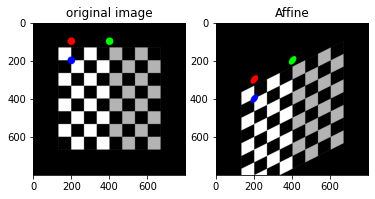

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

img_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Checkerboard_identity.svg/800px-Checkerboard_identity.svg.png'
img_path = keras.utils.get_file("checkerboard.jpg", img_url)
img = cv2.imread(img_path)

rows, cols, ch = img.shape

# 점3개를 변환 전과 변환 후로 나누어 지정
pts1 = np.float32([[200, 100], [400, 100], [200, 200]])
pts2 = np.float32([[200, 300], [400, 200], [200, 400]])

# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (200, 100), 20, (255, 0, 0), -1)
cv2.circle(img, (400, 100), 20, (0, 255, 0), -1)
cv2.circle(img, (200, 200), 20, (0, 0, 255), -1)

# Affine 변환 행렬 얻기
M = cv2.getAffineTransform(pts1, pts2)

# Affine 변환하기
dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img), plt.title('original image')
plt.subplot(122), plt.imshow(dst), plt.title('Affine')
plt.show()

위의 예제에서 본 Affine 변환을 다음과 같은 모양으로 변환해 봅시다.

$$
y = Ax + b
$$

$y$, $x$, $b$의 shape은 $(1,2)$이고 $A$의 shape은 $(2,2)$입니다.  



In [33]:
print(M)
A = M[:, :2]  # same as a=M[:, 0:2]
b = M[:, 2:]
print(A)
print(b)


[[  1.    0.    0. ]
 [ -0.5   1.  300. ]]
[[ 1.   0. ]
 [-0.5  1. ]]
[[  0.]
 [300.]]


**직접 Affine Matrix 설정하기**

다음과 같은 회전변환의 Affine matrix를 가정합니다.  

$$
A = \begin{bmatrix}
 \cos {\pi\over6} & -\sin {\pi\over6}\\ 
 \sin {\pi\over6} & \cos {\pi\over6}
\end{bmatrix},\quad
b = \begin{bmatrix}
 100\\
 -100
\end{bmatrix},\quad
$$

$2\pi$가 $360^{\circ}$ 이므로, ${\pi\over 6}$는 $30^{\circ}$에 해당합니다.


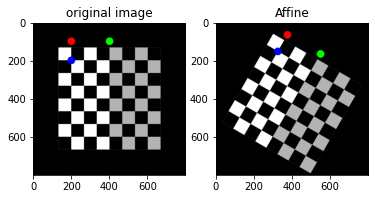

In [38]:
M = np.array([[np.cos(np.pi / 6), -np.sin(np.pi / 6), 250],
              [np.sin(np.pi / 6), np.cos(np.pi / 6), -120]])
# Affine 변환하기
dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img), plt.title('original image')
plt.subplot(122), plt.imshow(dst), plt.title('Affine')
plt.show()

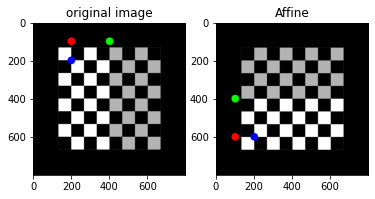

In [39]:
center = (cols / 2, rows / 2)
angle = 90
scale = 1
# 회전 변환
M = cv2.getRotationMatrix2D(center, angle, scale)
# Affine 변환하기
dst = cv2.warpAffine(img, M, (cols, rows))
plt.subplot(121), plt.imshow(img), plt.title('original image')
plt.subplot(122), plt.imshow(dst), plt.title('Affine')
plt.show()

#컨볼루션 필터

In [40]:
x = np.array([[1, 1, 1, 0, 0],
              [0, 1, 1, 1, 0],
              [0, 0, 1, 1, 1],
              [0, 0, 1, 1, 0],
              [0, 1, 1, 0, 0]], dtype=float)
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1], ], )
# borderType=cv2.BORDER_CONSTANT padding with zero
y = cv2.filter2D(x, -1, kernel, borderType=cv2.BORDER_CONSTANT)
print(y)

[[3. 5. 5. 3. 1.]
 [3. 6. 7. 6. 3.]
 [1. 4. 7. 7. 4.]
 [1. 4. 6. 6. 3.]
 [1. 3. 4. 3. 1.]]


35478/35478 [==============================] - 0s 0us/step


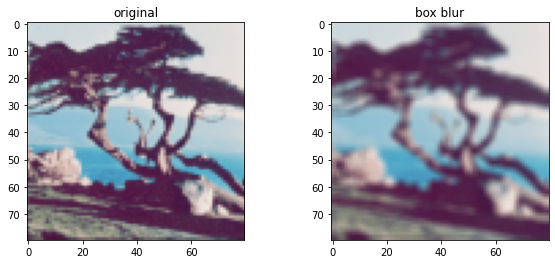

In [41]:
img_url = 'http://sipi.usc.edu/database/preview/misc/4.1.06.png'
filename = 'tree.png'

img_path = keras.utils.get_file(filename, img_url)

src = cv2.imread(img_path)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
image = cv2.resize(src, dsize=(80, 80), interpolation=cv2.INTER_AREA)

box_blur = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]]) / 9.
dst = cv2.filter2D(image, -1, box_blur)
plt.figure(figsize=(10, 4))
plt.subplot(121), plt.imshow(image), plt.title('original')
plt.subplot(122), plt.imshow(dst), plt.title('box blur')
plt.show()

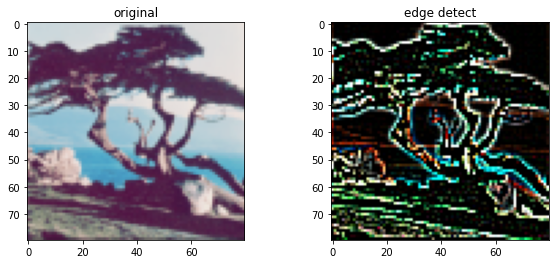

In [42]:
edge_detect = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])
kernel = edge_detect
dst = cv2.filter2D(image, -1, kernel)
plt.figure(figsize=(10, 4))
plt.subplot(121), plt.imshow(image), plt.title('original')
plt.subplot(122), plt.imshow(dst), plt.title('edge detect')
plt.show()

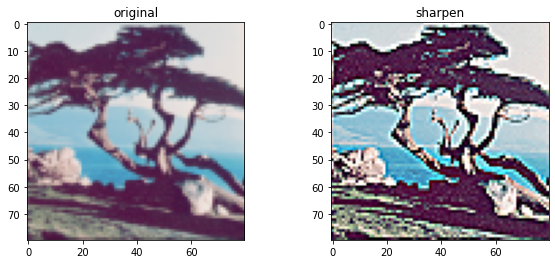

In [44]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
kernel = sharpen
dst = cv2.filter2D(image, -1, kernel)
plt.figure(figsize=(10, 4))
plt.subplot(121), plt.imshow(image), plt.title('original')
plt.subplot(122), plt.imshow(dst), plt.title('sharpen')
plt.show()